In [132]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import model_project as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
# solve the model
par = model.setup()
par.theta0 = 0
par.theta1 = 0.2

par = model.create_grids(par)
sol = model.solve(par)

/Users/emilblicher/Python/Dynamic Programming/Notebooks/Term paper/DP2021/Model w VFI/model_project.py:197: RuntimeWarning: invalid value encountered in double_scalars
  return theta(par.theta0,par.theta1,N)*((c1**(1.0-par.rho))/(1.0-par.rho)) + (1-theta(par.theta0,par.theta1,N))*((c2**(1.0-par.rho))/(1.0-par.rho))


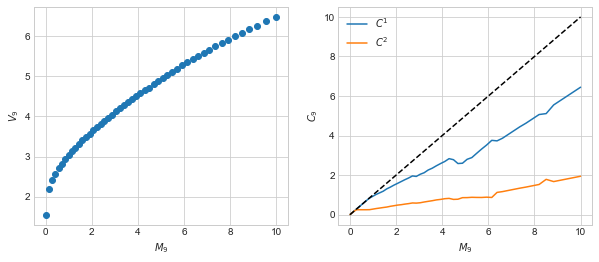

In [137]:
# Define a function for the solution
def plot_solution(sol,par,t):
    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    
    ax = fig.add_subplot(1,2,1)
    ax.scatter(par.grid_M,sol.V[t])
    ax.set_xlabel("$M_{" + str(t+1) + "}$")
    ax.set_ylabel("$V_{" + str(t+1) + "}$")

    ax_right = fig.add_subplot(1,2,2)
    ax_right.plot(par.grid_M,sol.c1[t])
    ax_right.plot(par.grid_M,sol.c2[t])
    ax_right.plot(par.grid_M,par.grid_M,color='black',linestyle='dashed')
    ax_right.set_xlabel("$M_{" + str(t+1) + "}$")
    ax_right.set_ylabel("$C_{" + str(t+1) + "}$")
    ax_right.legend(['$C^1$','$C^2$'])
    plt.show()

plot_solution(sol,par,8)

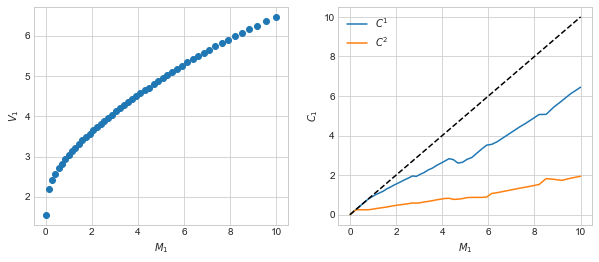

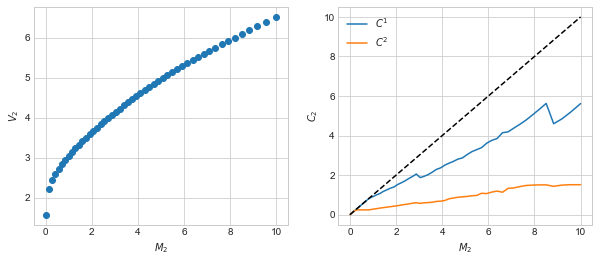

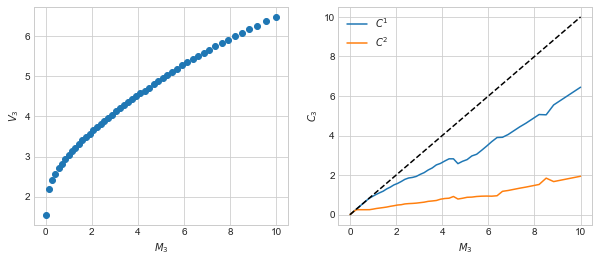

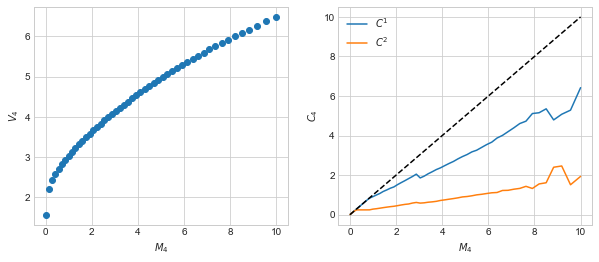

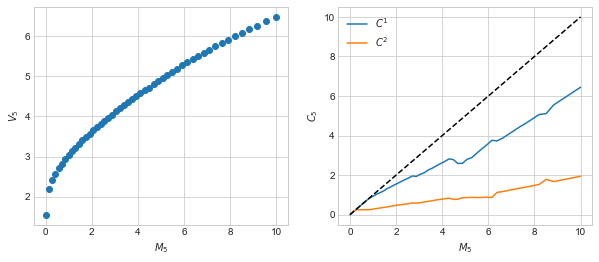

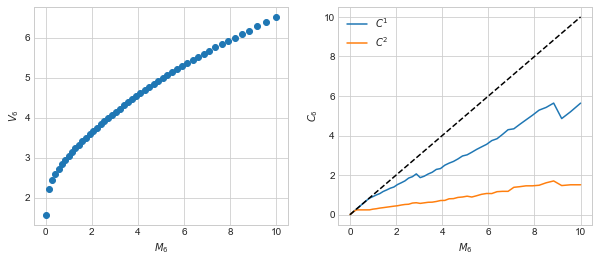

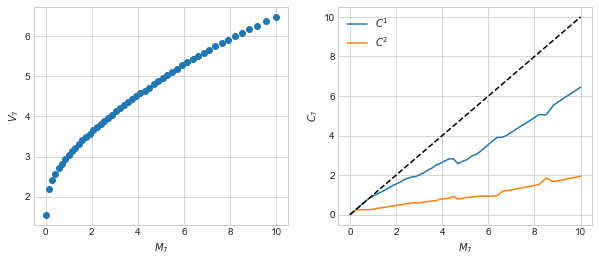

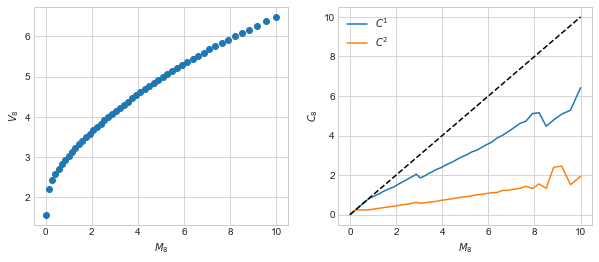

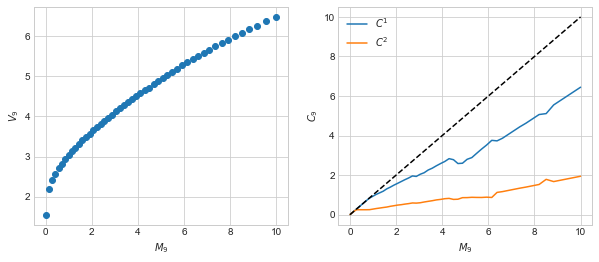

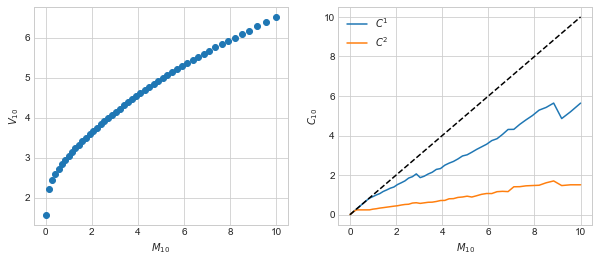

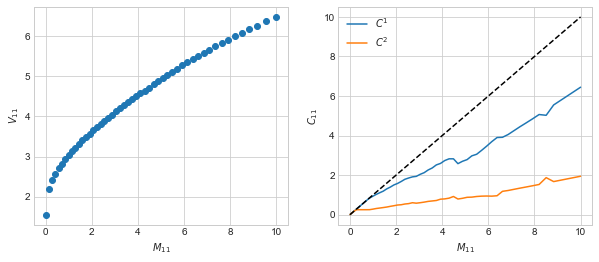

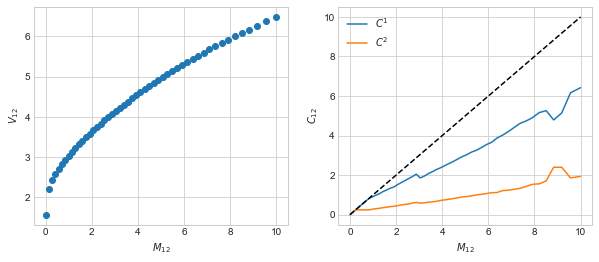

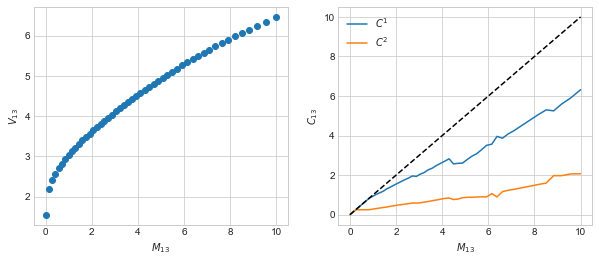

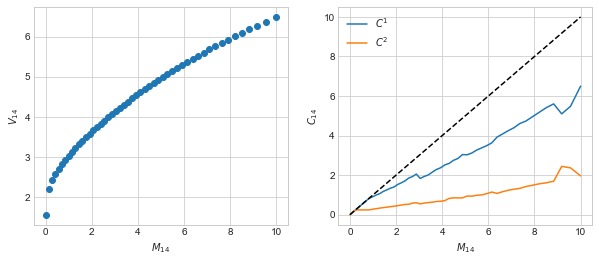

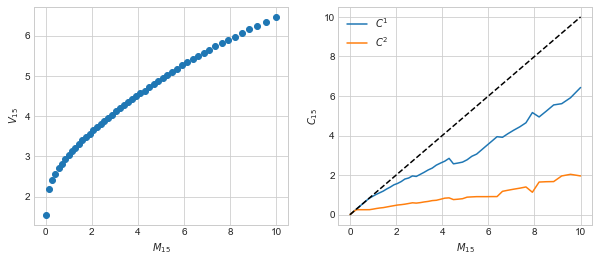

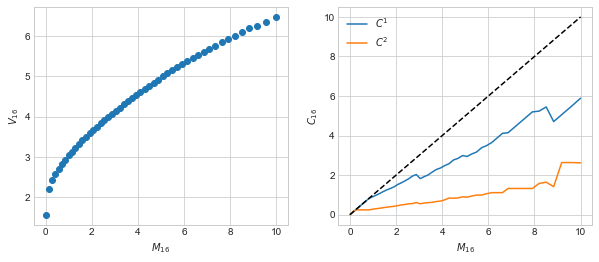

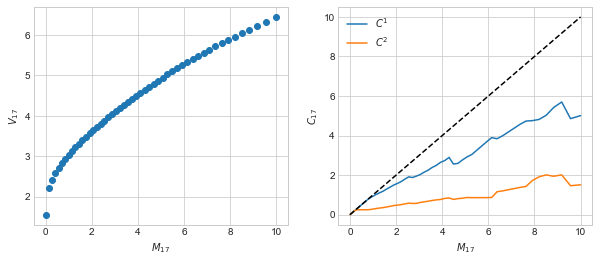

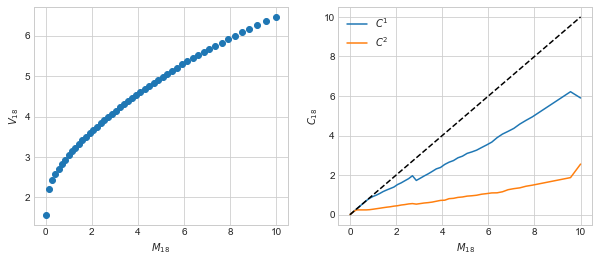

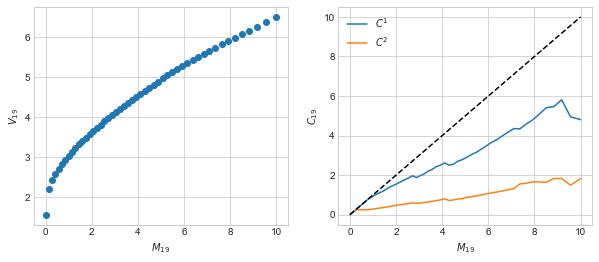

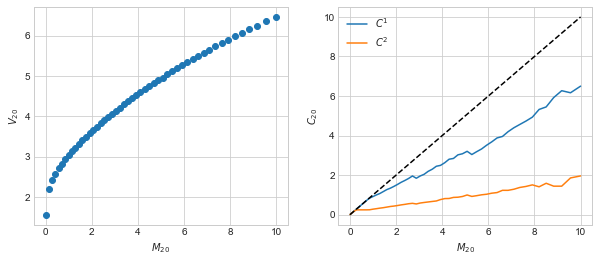

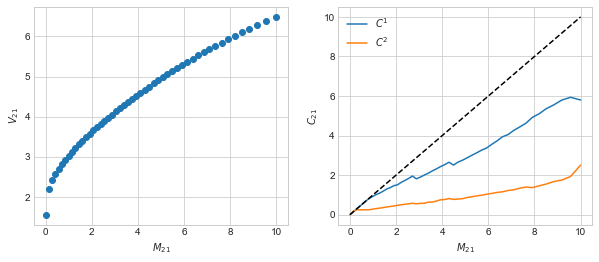

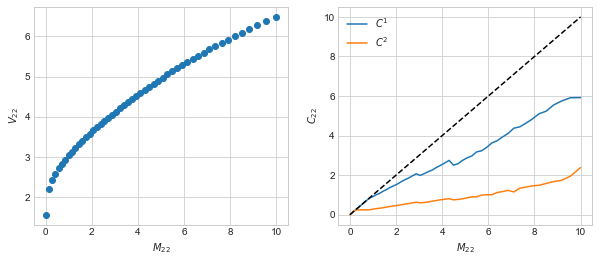

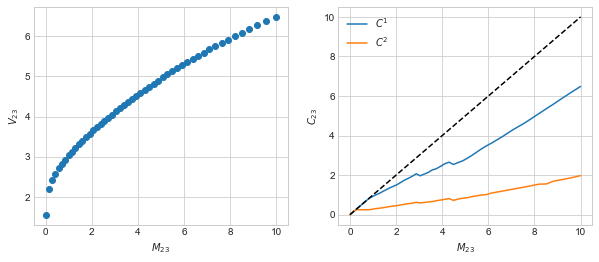

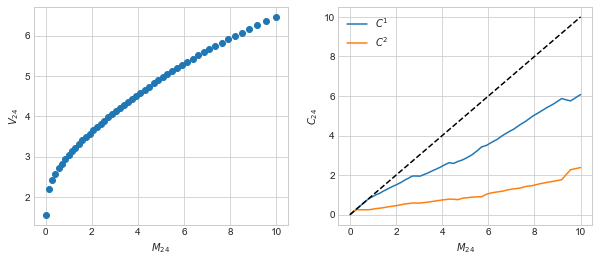

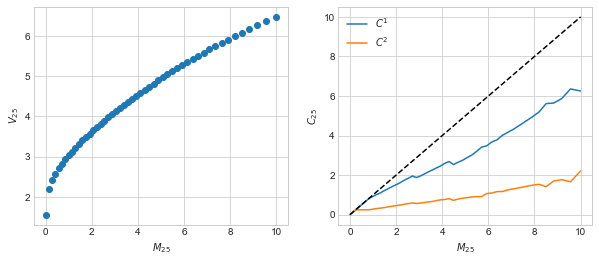

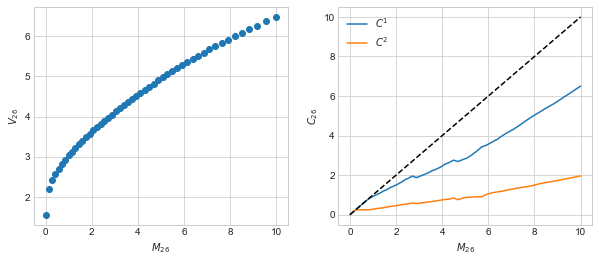

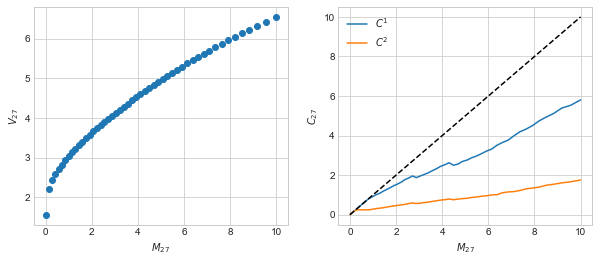

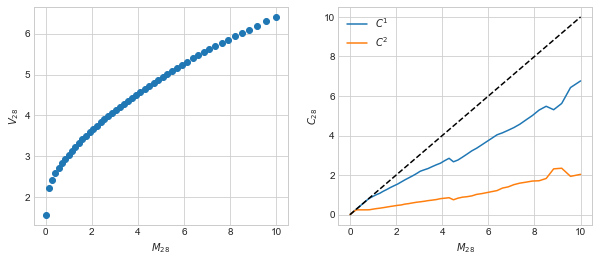

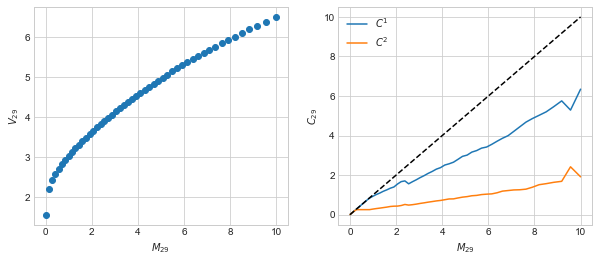

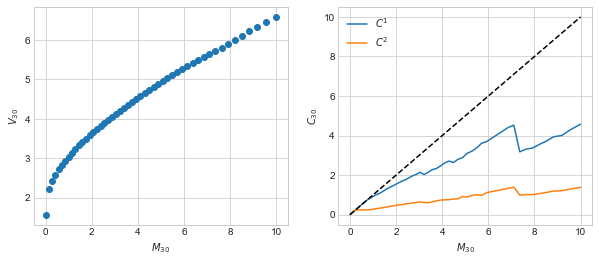

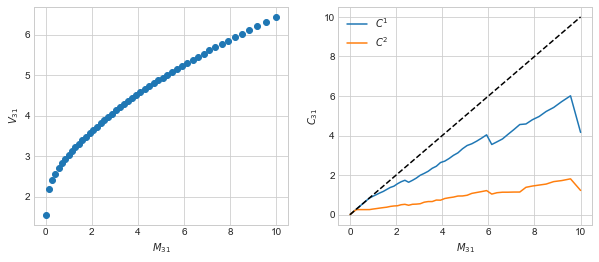

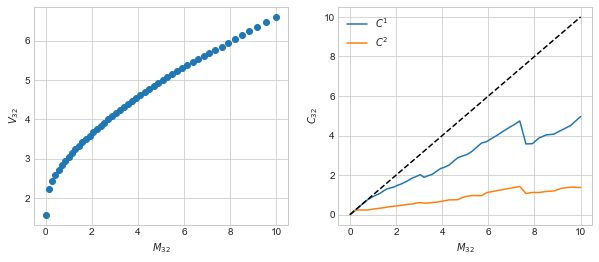

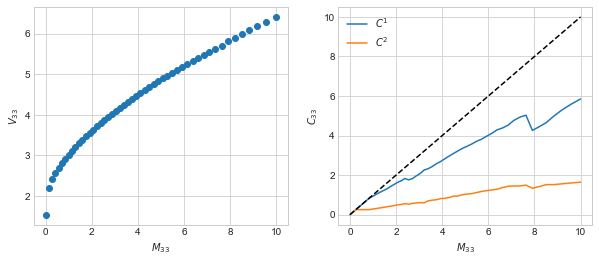

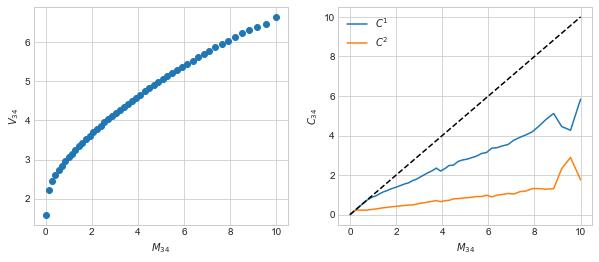

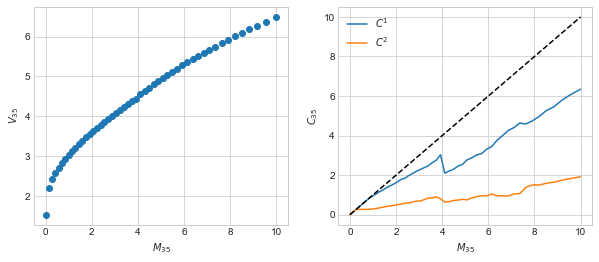

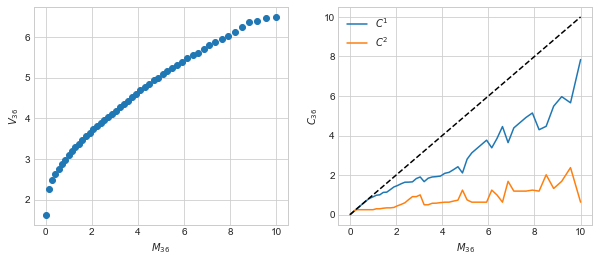

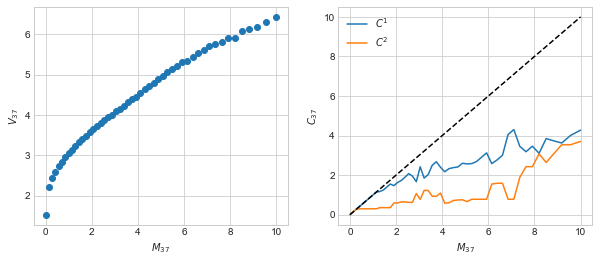

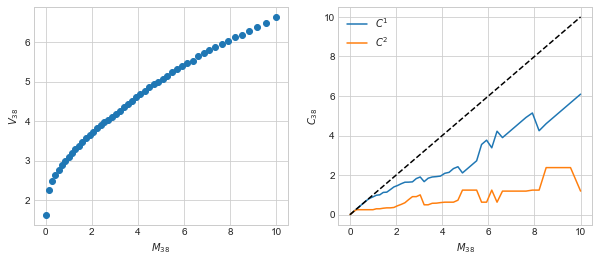

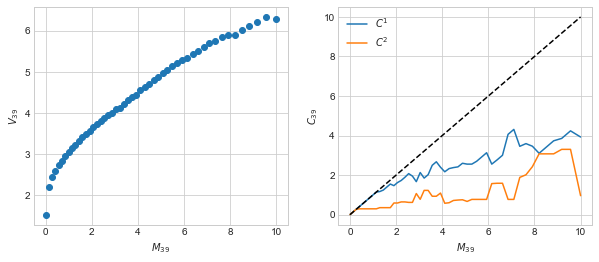

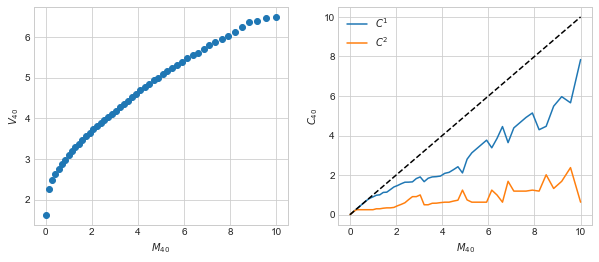

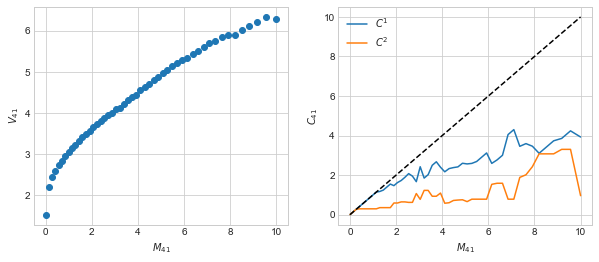

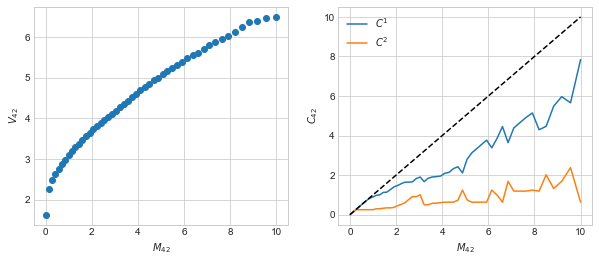

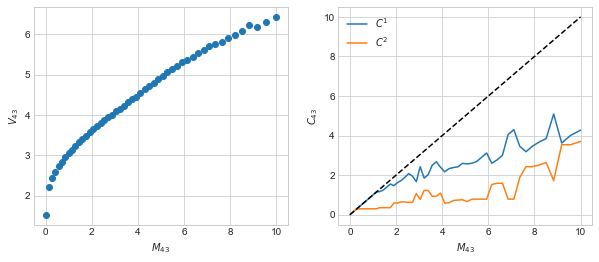

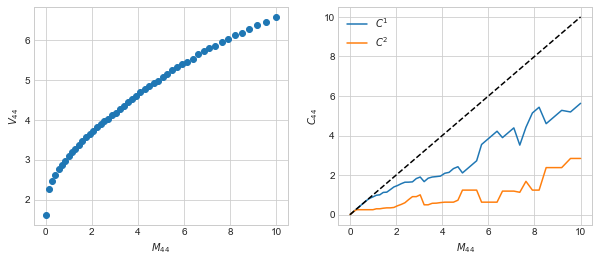

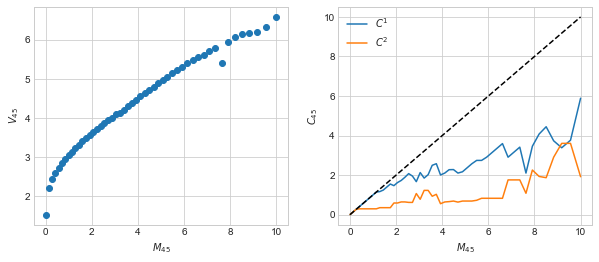

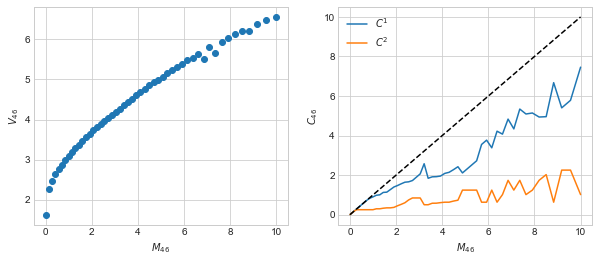

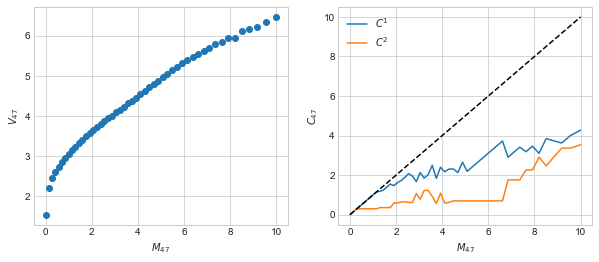

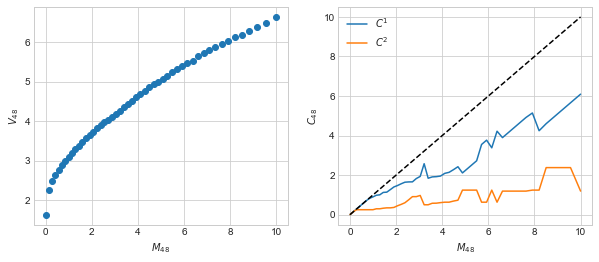

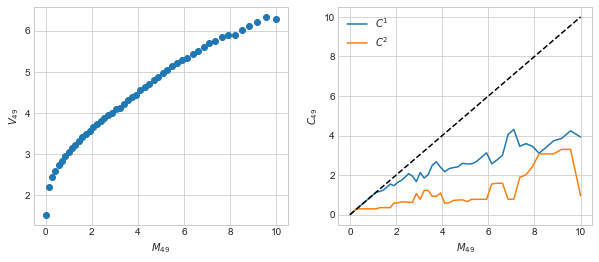

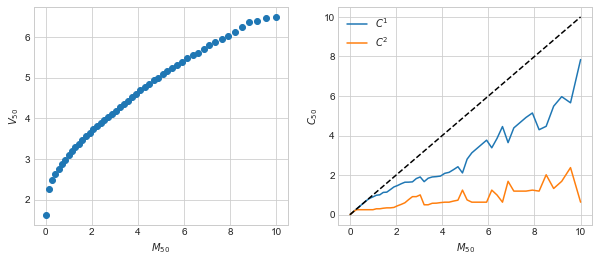

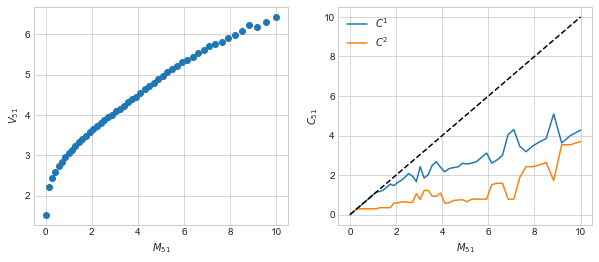

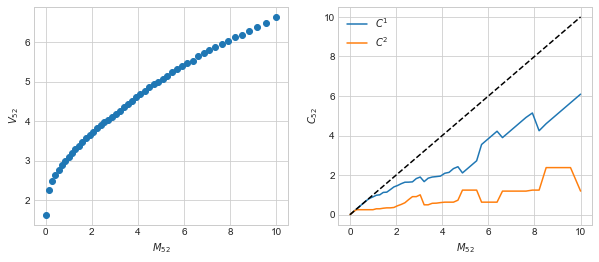

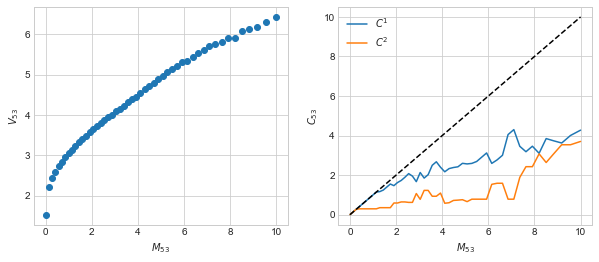

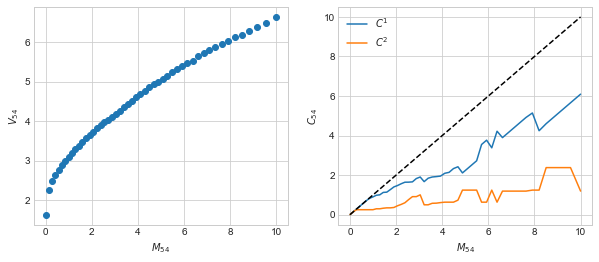

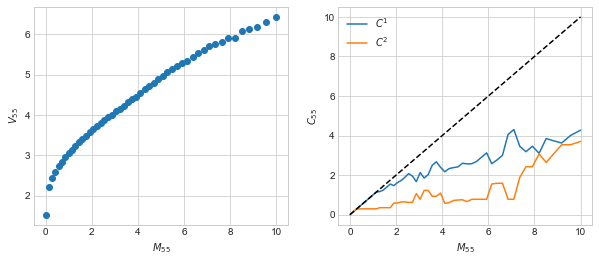

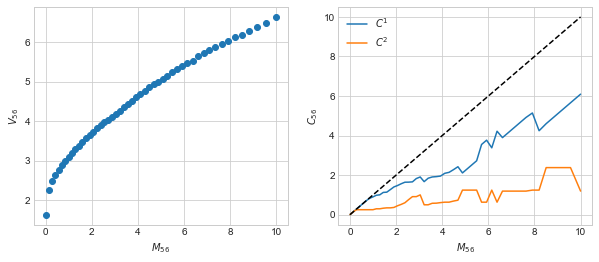

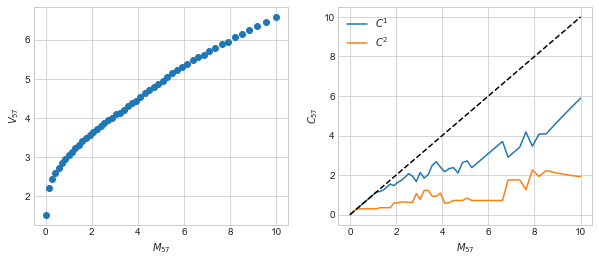

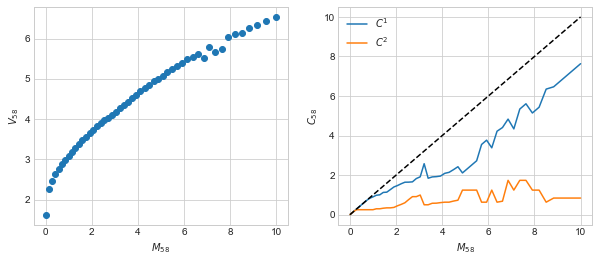

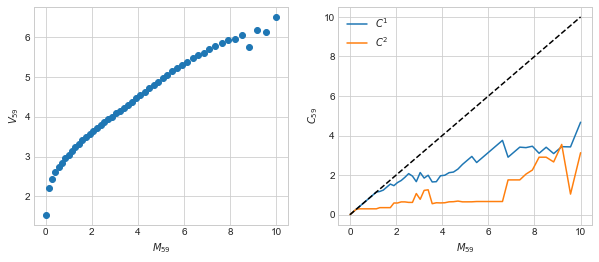

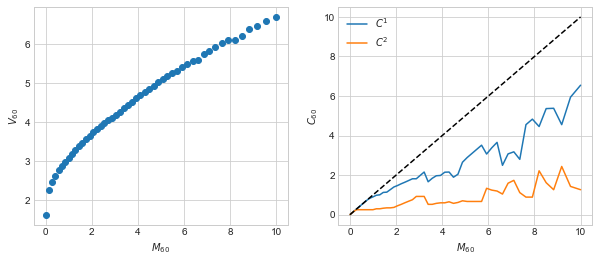

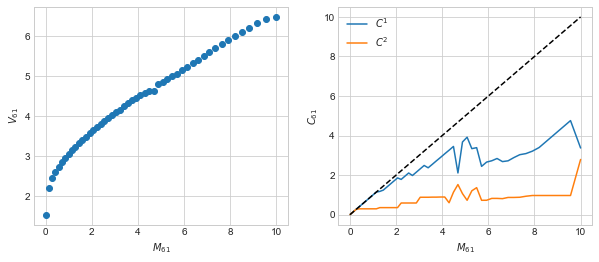

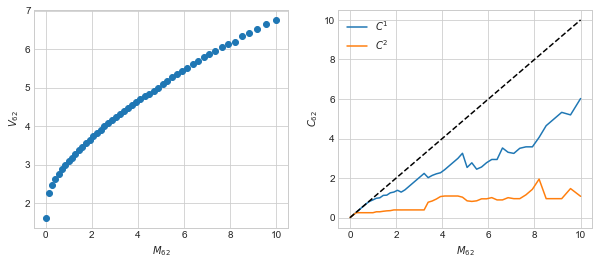

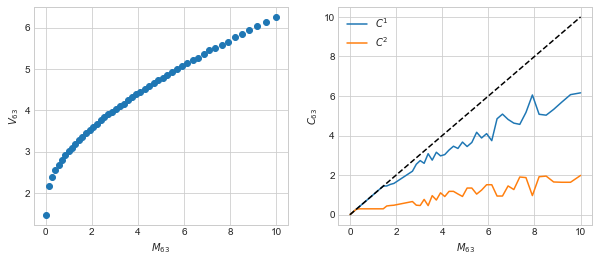

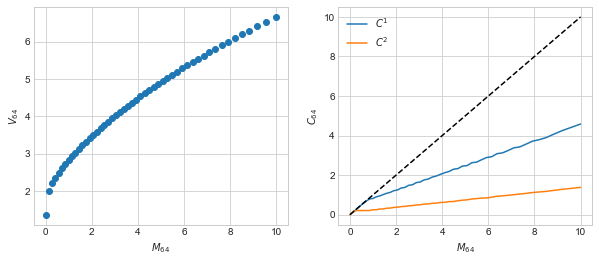

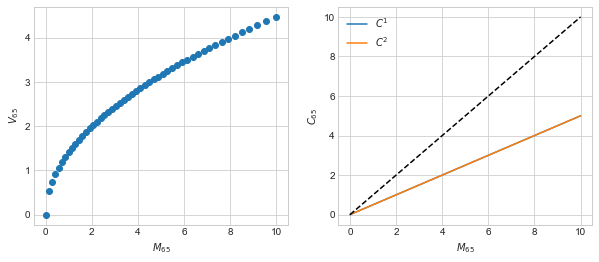

In [138]:
for t in range(65):
    plot_solution(sol,par,t)

In [139]:
# Set-up
par.mu = 0
par.sigma = 0.1

# Allocate
class sim: pass
shape = (par.T, par.simN)
sim.M = par.sim_M_ini*np.ones(shape)
sim.C1 = np.nan +np.zeros(shape)
sim.C2 = np.nan +np.zeros(shape)


# Simulate 
np.random.seed(2020)  #Seed value, it ensures that the computer draw the same "random"-numbers each time

for t in range(par.T):
    sim.C1[t,:] = tools.interp_linear_1d(par.grid_M, sol.c1[t,:],sim.M[t,:])  # Find consumption given states
    sim.C2[t,:] = tools.interp_linear_1d(par.grid_M, sol.c2[t,:],sim.M[t,:])  # Find consumption given states
    
    if t<par.T-1:  # if not last period
        logY = np.random.normal(par.mu,par.sigma,par.simN)  # It draws random numbers from the normal distirbution
        Y = np.exp(logY)
        A = sim.M[t,:]-sim.C1[t,:]-sim.C2[t,:]
        
        sim.M[t+1,:] = par.R*A + Y # The state in the following period

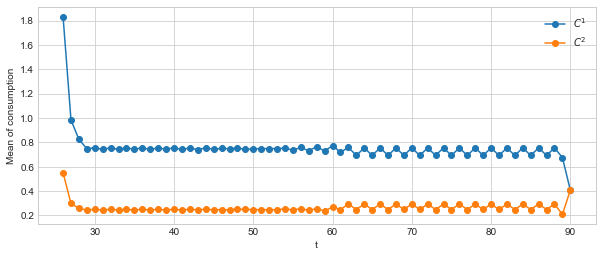

In [140]:
# Define a function for the simulation
def figure_sim(simC1,simC2,par):
    fig = plt.figure(figsize=(10,4))# figsize is in inches...
    t_grid = [t+25 for t in range(1,par.T+1)]    
    ax = fig.add_subplot(1,1,1)
    ax.plot(t_grid,np.mean(simC1,1),'-o')
    ax.plot(t_grid,np.mean(simC2,1),'-o')
    ax.set_xlabel(f"t")
    ax.set_ylabel(f"Mean of consumption")
    ax.legend(['$C^1$','$C^2$'])
    plt.show()
    
figure_sim(sim.C1,sim.C2,par)

In [ ]:
ss